## Build model to predict Hate Speech

In [ ]:
# Mounting Google Drive
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
# Importing libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, classification_report, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

In [ ]:
# Load the dataset
df = pd.read_csv('/content/gdrive/My Drive/Dataset/Master1.csv',  on_bad_lines='skip')
df = df[['Translated_Comment', 'Hate Speech', 'Geography']]
df = df.dropna()

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['Translated_Comment'], df['Hate Speech'], test_size=0.2, random_state=42)

In [ ]:
# Preprocess the text data
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def preprocess_text(text):
  try:
    text = text.lower()
    text = re.sub('[^a-zA-Z]', ' ', text)
    words = text.split()
    words = [word for word in words if word not in stop_words]
    words = ' '.join(words)
    return words
  except:
    print("An exception occurred: ")

X_train = X_train.apply(preprocess_text)
X_test = X_test.apply(preprocess_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Vectorize the text data using TfidfVectorizer
tfidf = TfidfVectorizer(max_features=5000)
X_train = tfidf.fit_transform(X_train)
X_test = tfidf.transform(X_test)

# Train the logistic regression classifier
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Predict on the test data
y_pred = clf.predict(X_test)



In [ ]:
 # Evaluate the performance of the classifier
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, pos_label='positive', average='micro')
rec = recall_score(y_test, y_pred, pos_label='positive', average='macro')
f1 = f1_score(y_test, y_pred, pos_label='positive', average='weighted')
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1 Score:", f1)
print("Confusion Matrix:\n", cm)

Accuracy: 0.7306233062330624
Precision: 0.7306233062330624
Recall: 0.4872727900176039
F1 Score: 0.7303826586250419
Confusion Matrix:
 [[  0   1   0]
 [  0 691 240]
 [  0 256 657]]


In [ ]:
#Let's try to train the SVM model
from sklearn.svm import SVC

# Train an SVM model
svm_model = SVC(kernel='rbf')
svm_model.fit(X_train, y_train)


SVC()

In [ ]:
y_pred = svm_model.predict(X_test)

In [ ]:
 # Evaluate the performance of the classifier
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, pos_label='positive', average='micro')
rec = recall_score(y_test, y_pred, pos_label='positive', average='macro')
f1 = f1_score(y_test, y_pred, pos_label='positive', average='weighted')
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1 Score:", f1)
print("Confusion Matrix:\n", cm)

Accuracy: 0.7355013550135502
Precision: 0.7355013550135502
Recall: 0.49043160239826605
F1 Score: 0.735100451307656
Confusion Matrix:
 [[  0   1   0]
 [  0 709 222]
 [  0 265 648]]


In [ ]:
#Let's try to train the SVM model
from sklearn.svm import SVC

# Train an SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)


SVC(kernel='linear')

In [ ]:
y_pred = svm_model.predict(X_test)

In [ ]:
 # Evaluate the performance of the classifier
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, pos_label='positive', average='micro')
rec = recall_score(y_test, y_pred, pos_label='positive', average='macro')
f1 = f1_score(y_test, y_pred, pos_label='positive', average='weighted')
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1 Score:", f1)
print("Confusion Matrix:\n", cm)

Accuracy: 0.7279132791327914
Precision: 0.7279132791327914
Recall: 0.4853837770768652
F1 Score: 0.7275402006919706
Confusion Matrix:
 [[  0   1   0]
 [  0 700 231]
 [  0 270 643]]


In [ ]:
 # Evaluate the performance of the classifier
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, pos_label='positive', average='micro')
rec = recall_score(y_test, y_pred, pos_label='positive', average='macro')
f1 = f1_score(y_test, y_pred, pos_label='positive', average='weighted')
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1 Score:", f1)
print("Confusion Matrix:\n", cm)

Accuracy: 0.7306233062330624
Precision: 0.7306233062330624
Recall: 0.4872727900176039
F1 Score: 0.7303826586250419
Confusion Matrix:
 [[  0   1   0]
 [  0 691 240]
 [  0 256 657]]


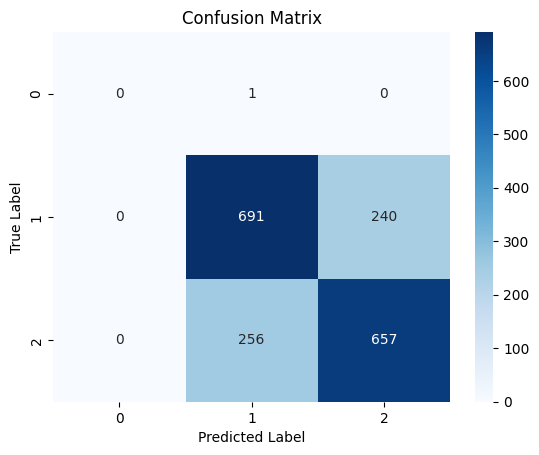

In [ ]:
# Plot the results using a heatmap
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


## Predict Location Model

                                                                                                                                           precision    recall  f1-score   support

 अधिकारी और पुलिस वाले करप्ट हैं. ये बयान हर किसी के लिए नहीं हो सकता. लोग समझदार हैं. वो अच्छे और बुरे का फर्क समझते हैं. @TandonRaveena       0.00      0.00      0.00         1
                                                                                                                                     Arab       0.85      0.91      0.88       495
                                                                                                                               Bangladesh       0.85      0.89      0.87       395
                                                                                                                                    China       0.92      0.92      0.92       410
                                                                                                        

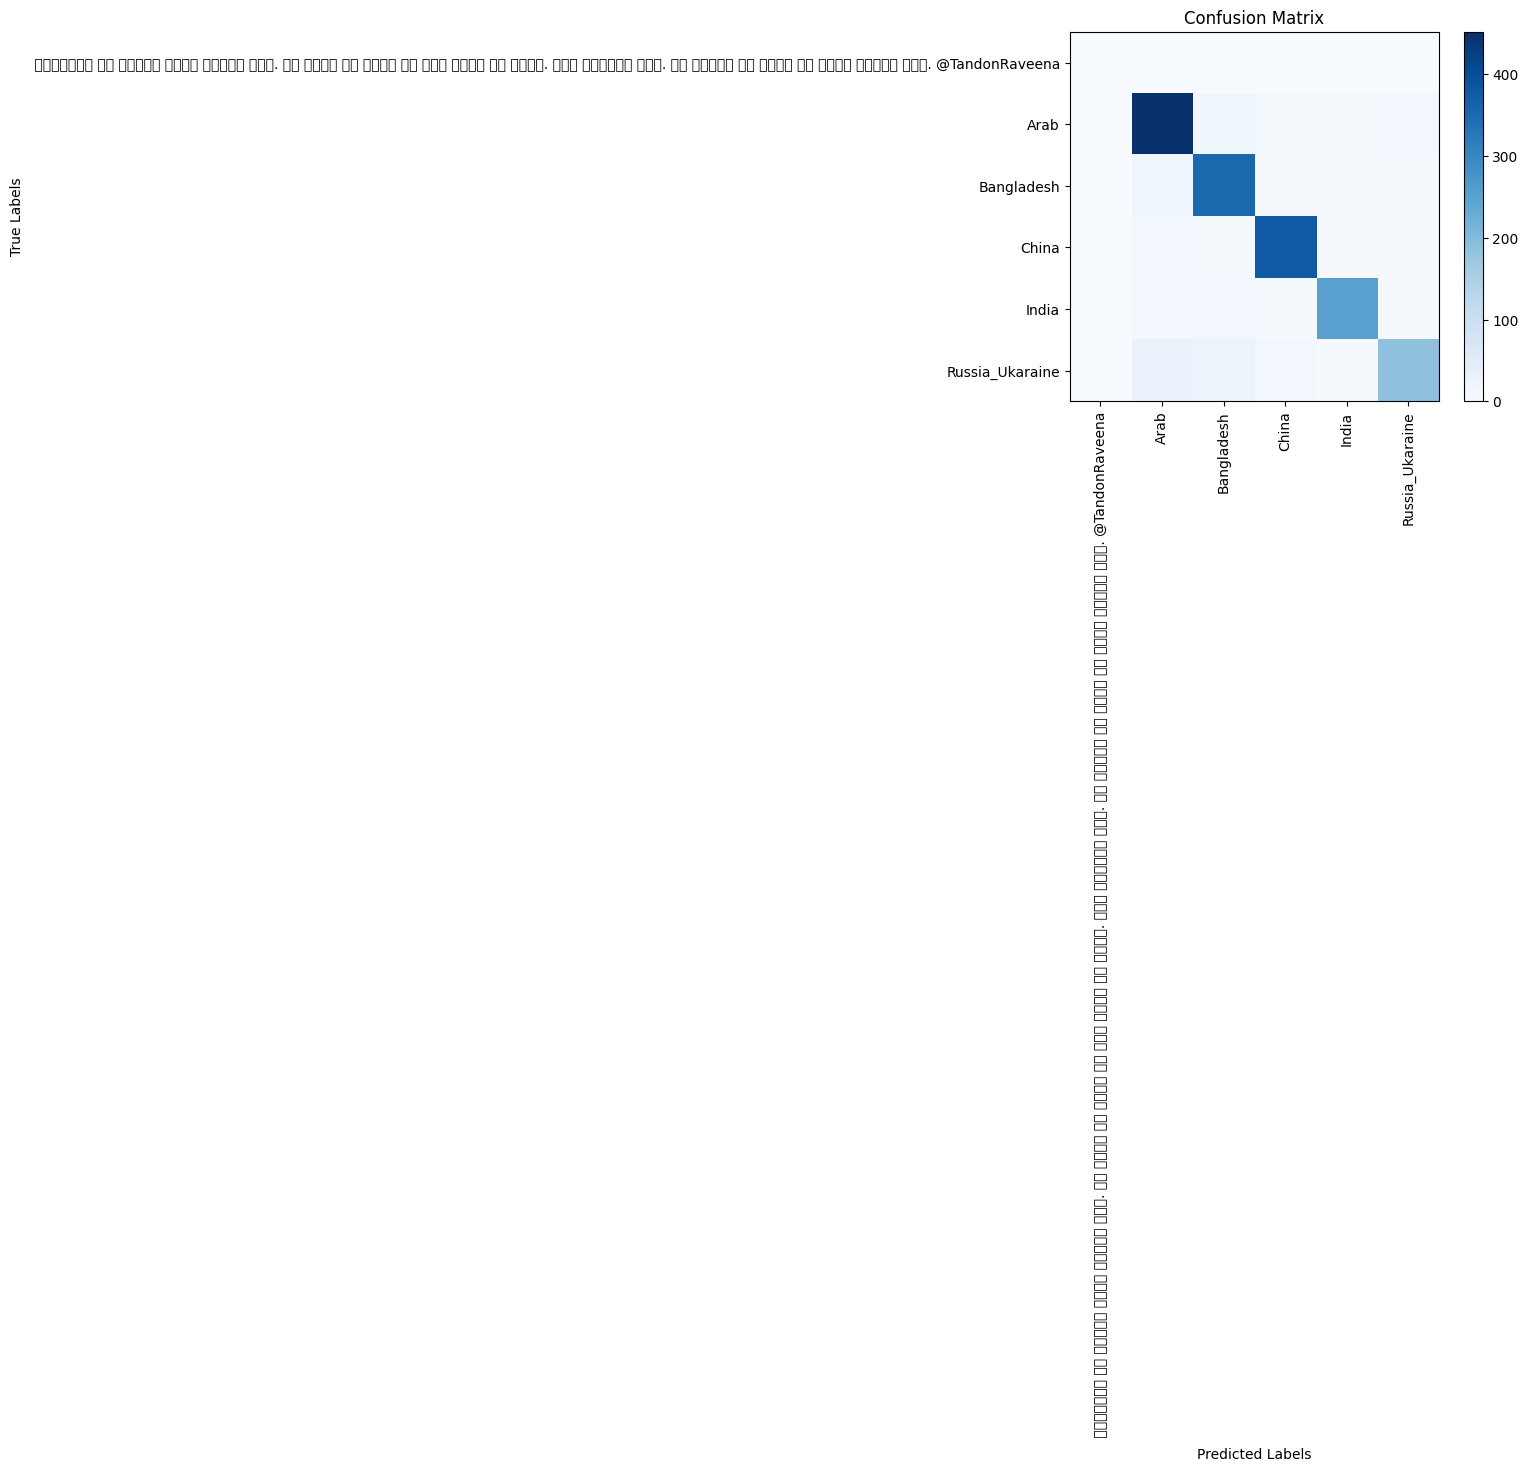

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df["Translated_Comment"], df["Geography"], test_size=0.2, random_state=42)

# Create a Tf-Idf vectorizer and fit it on the training data
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)

# Create a logistic regression classifier and fit it on the training data
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train_tfidf, y_train)

# Use the classifier to predict the test data
X_test_tfidf = tfidf.transform(X_test)
y_pred = clf.predict(X_test_tfidf)

# Print the classification report and accuracy score
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.imshow(conf_matrix, cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.xticks(range(len(set(y_test))), sorted(set(y_test)), rotation=90)
plt.yticks(range(len(set(y_test))), sorted(set(y_test)))
plt.colorbar()
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

                                                                                                                                           precision    recall  f1-score   support

 अधिकारी और पुलिस वाले करप्ट हैं. ये बयान हर किसी के लिए नहीं हो सकता. लोग समझदार हैं. वो अच्छे और बुरे का फर्क समझते हैं. @TandonRaveena       0.00      0.00      0.00         1
                                                                                                                                     Arab       0.85      0.91      0.88       495
                                                                                                                               Bangladesh       0.85      0.89      0.87       395
                                                                                                                                    China       0.92      0.92      0.92       410
                                                                                                        

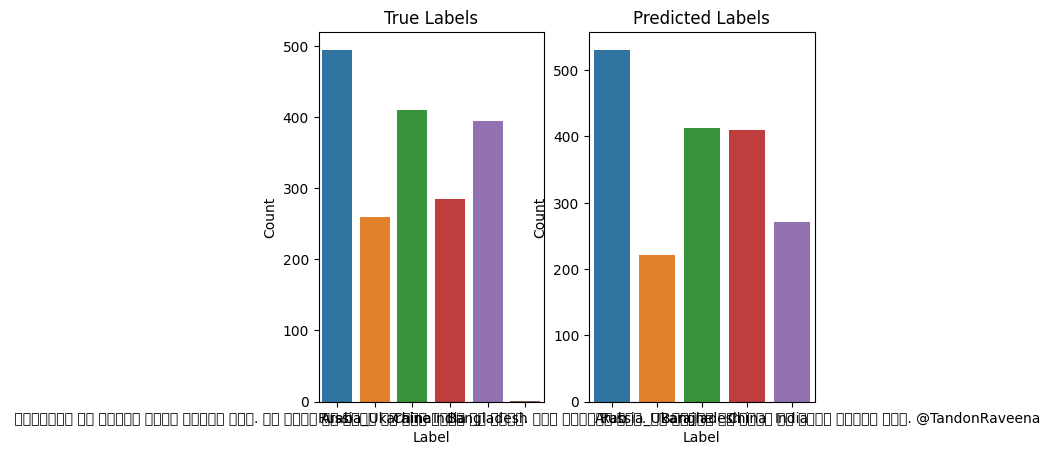

In [ ]:
# Plot the distribution of true and predicted labels
plt.subplot(1, 2, 1)
sns.countplot(x=y_test)
plt.title("True Labels")
plt.xlabel("Label")
plt.ylabel("Count")
plt.subplot(1, 2, 2)
sns.countplot(x=y_pred)
plt.title("Predicted Labels")
plt.xlabel("Label")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [ ]:
#Let's try to train the SVM model
from sklearn.svm import SVC

# Train an SVM model
svm_model = SVC(kernel='rbf')
svm_model.fit(X_train_tfidf, y_train)



SVC()

In [ ]:
predictions = svm_model.predict(X_test_tfidf)

In [ ]:
report = classification_report(y_test, predictions)
print(report)

                                                                                                                                           precision    recall  f1-score   support

 अधिकारी और पुलिस वाले करप्ट हैं. ये बयान हर किसी के लिए नहीं हो सकता. लोग समझदार हैं. वो अच्छे और बुरे का फर्क समझते हैं. @TandonRaveena       0.00      0.00      0.00         1
                                                                                                                                     Arab       0.84      0.93      0.88       495
                                                                                                                               Bangladesh       0.84      0.91      0.88       395
                                                                                                                                    China       0.93      0.91      0.92       410
                                                                                                        

In [ ]:
#Let's try to train the SVM model
from sklearn.svm import SVC

# Train an SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_tfidf, y_train)

SVC(kernel='linear')

In [ ]:
predictions = svm_model.predict(X_test_tfidf)

In [ ]:
report = classification_report(y_test, predictions)
print(report)

                                                                                                                                           precision    recall  f1-score   support

 अधिकारी और पुलिस वाले करप्ट हैं. ये बयान हर किसी के लिए नहीं हो सकता. लोग समझदार हैं. वो अच्छे और बुरे का फर्क समझते हैं. @TandonRaveena       0.00      0.00      0.00         1
                                                                                                                                     Arab       0.84      0.92      0.87       495
                                                                                                                               Bangladesh       0.88      0.90      0.89       395
                                                                                                                                    China       0.94      0.93      0.93       410
                                                                                                        